# Probabilidad y Estadística para la Inteligencia Artificial
## EXAMEN FINAL

Don Francisco es un pequeño comerciante de barrio con más de 40 años de experiencia en su negocio. Gracias a su esfuerzo, don Francisco cuenta hoy con dos supermercados de barrio, con los que sostiene su familia: El supermercado ’Santa Ana’ y el supermercado ’La Floresta’. Uno de sus hijos, Matías, quien recién inicia a cursar la Especialización en Inteligencia Artificial del LSE de la UBA, le propone hacer un análisis de las ventas durante el año anterior, con el fin de hacer pronósticos para el año siguiente, lo que a don Francisco le parece buena idea y le plantea algunas inquietudes: 
1. Don Francisco necesita saber en qué mes se puede tomar unas vacaciones. También necesita saber en qué mes las ventas serán mejoras para embarcarse en una inversión importante. Por ello le pregunta a Matías, ¿cómo se comportan las ventas en cada mes? 
2. De forma similar a la anterior, don Francisco necesita reacomodar los horarios de atención de sus supermercados a lo largo de la semana; también debe decidir en qué días debe contratar más empleados y en qué días podría contratar menos. Por ello pregunta, ¿cómo se comportan las ventas en cada día de la semana? 
3. Don Francisco está un poco preocupado porque tiene la impresión de que la tienda ’La Floresta’ vende menos que la tienda ’Santa Ana’. Don Francisco le entrega a Matías el cuaderno donde tiene registrado el valor total de sus ventas en cada día del año. 

Con esta información, Matías construye sendas tablas por cada tienda en unas hojas de cálculo, en las cuales la primera columna corresponde a la fecha y la segunda corresponde al monto de las ventas, en dólares para evitarse dolores de cabeza con la inflación. Matías no se siente muy seguro de la tarea a realizar, así que les pide ayuda a ustedes para abordar el problema. 

1. (3.5 puntos) Determinen funciones empíricas de distribución para las ventas en ambas tiendas durante cada uno de los meses del año. Determinen también aproximaciones a las funciones de densidad para las distribuciones anteriores. Determine intervalos de confianza empíricos para cada mes, para significancias del 95 % y el 99 %. 
2. (3.5 puntos) Determine funciones empíricas de distribución para las ventas en ambas tiendas por cada día de la semana. Establezcan aproximaciones a las funciones de densidad para las distribuciones anteriores. Establezcan también intervalos de confianza empíricos para cada día de la semana, para significancias del 95 % y el 99 %. 
3. (3 puntos) Realicen pruebas de hipótesis, con base en los datos, para aceptar o rechazar la intuición de Don Francisco, con significancias de 95 % y 99 %. 

Deben realizar un informe en un documento pdf, en donde queden claros los siguientes aspectos: 
1. Planteamiento de los problemas de investigación
2. Procesamiento realizado a los datos 
3. Resultados encontrados 
4. Análisis y conclusiones


## Desarrollo

### 1. Don Francisco necesita saber en qué mes se puede tomar unas vacaciones. También necesita saber en qué mes las ventas serán mejoras para embarcarse en una inversión importante. Por ello le pregunta a Matías, ¿cómo se comportan las ventas en cada mes?
#### (3.5 puntos) Determinen funciones empíricas de distribución para las ventas en ambas tiendas durante cada uno de los meses del año. Determinen también aproximaciones a las funciones de densidad para las distribuciones anteriores. Determine intervalos de confianza empíricos para cada mes, para significancias del 95 % y el 99 %.

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [10]:
# Cargar los datos
santa_ana_data = pd.read_excel('dataset.xlsx', sheet_name='Santa Ana')
la_floresta_data = pd.read_excel('dataset.xlsx', sheet_name='La Floresta')

# Agregar una columna de mes a los datos
santa_ana_data['Mes'] = santa_ana_data['Fecha'].dt.month
la_floresta_data['Mes'] = la_floresta_data['Fecha'].dt.month

# Función para calcular la función empírica de distribución y la densidad
def calcular_fed_densidad(data, columna):
    fed = {}
    densidad = {}
    for mes in range(1, 13):
        ventas_mes = data[data['Mes'] == mes][columna]
        fed[mes] = np.sort(ventas_mes)
        densidad[mes] = stats.gaussian_kde(ventas_mes)
    return fed, densidad

# Calcular funciones empíricas de distribución y densidades
fed_santa_ana, densidad_santa_ana = calcular_fed_densidad(santa_ana_data, 'Ventas')
fed_la_floresta, densidad_la_floresta = calcular_fed_densidad(la_floresta_data, 'Ventas')


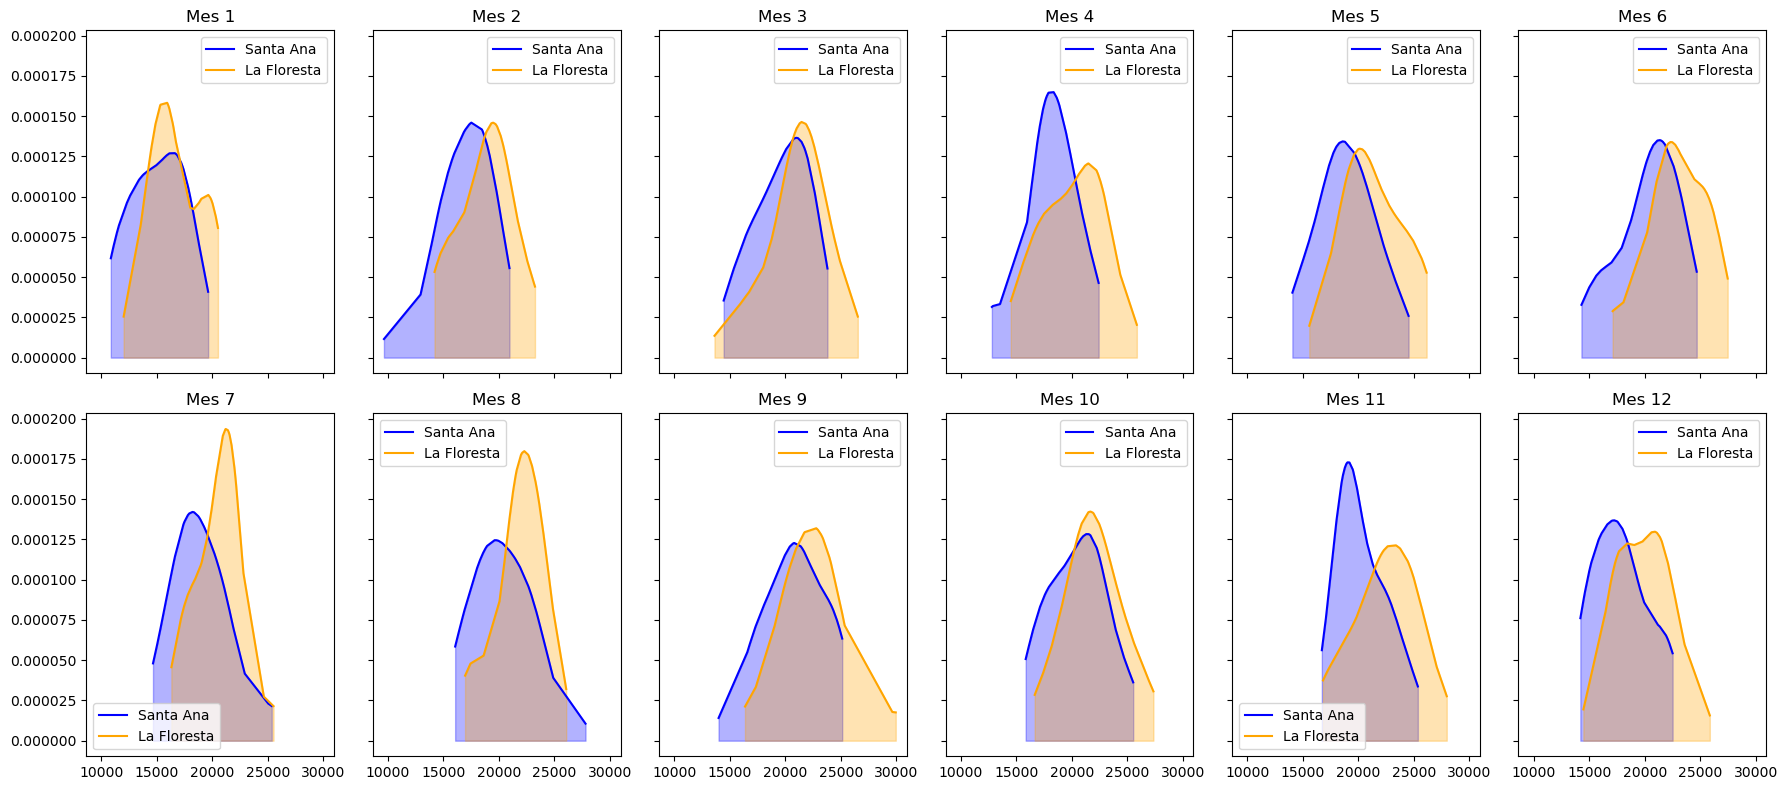

In [11]:
# Visualización de funciones empíricas de distribución y densidades para todos los meses

fig, axes = plt.subplots(2, 6, figsize=(18, 8), sharex=True, sharey=True)
axes = axes.flatten()

for mes in range(1, 13):
    x_santa_ana = fed_santa_ana[mes]
    y_santa_ana = densidad_santa_ana[mes](x_santa_ana)
    x_la_floresta = fed_la_floresta[mes]
    y_la_floresta = densidad_la_floresta[mes](x_la_floresta)
    
    axes[mes-1].plot(x_santa_ana, y_santa_ana, label='Santa Ana', color='blue')
    axes[mes-1].plot(x_la_floresta, y_la_floresta, label='La Floresta', color='orange')
    axes[mes-1].fill_between(x_santa_ana, y_santa_ana, alpha=0.3, color='blue')
    axes[mes-1].fill_between(x_la_floresta, y_la_floresta, alpha=0.3, color='orange')
    axes[mes-1].set_title(f'Mes {mes}')
    axes[mes-1].legend()

plt.tight_layout()
plt.show()


In [12]:
# Función para calcular intervalos de confianza
def calcular_intervalos_confianza(data, columna, confianza):
    intervalos = {}
    for mes in range(1, 13):
        ventas_mes = data[data['Mes'] == mes][columna]
        media = np.mean(ventas_mes)
        sem = stats.sem(ventas_mes)
        intervalo = stats.t.interval(confianza, len(ventas_mes)-1, loc=media, scale=sem)
        intervalos[mes] = intervalo
    return intervalos

# Calcular intervalos de confianza al 95% y 99%
intervalos_95_santa_ana = calcular_intervalos_confianza(santa_ana_data, 'Ventas', 0.95)
intervalos_99_santa_ana = calcular_intervalos_confianza(santa_ana_data, 'Ventas', 0.99)

intervalos_95_la_floresta = calcular_intervalos_confianza(la_floresta_data, 'Ventas', 0.95)
intervalos_99_la_floresta = calcular_intervalos_confianza(la_floresta_data, 'Ventas', 0.99)

# Mostrar resultados en tablas
intervalos_confianza_santa_ana = pd.DataFrame({
    'Mes': list(range(1, 13)),
    'IC 95% Inferior': [intervalos_95_santa_ana[mes][0] for mes in range(1, 13)],
    'IC 95% Superior': [intervalos_95_santa_ana[mes][1] for mes in range(1, 13)],
    'IC 99% Inferior': [intervalos_99_santa_ana[mes][0] for mes in range(1, 13)],
    'IC 99% Superior': [intervalos_99_santa_ana[mes][1] for mes in range(1, 13)],
})

intervalos_confianza_la_floresta = pd.DataFrame({
    'Mes': list(range(1, 13)),
    'IC 95% Inferior': [intervalos_95_la_floresta[mes][0] for mes in range(1, 13)],
    'IC 95% Superior': [intervalos_95_la_floresta[mes][1] for mes in range(1, 13)],
    'IC 99% Inferior': [intervalos_99_la_floresta[mes][0] for mes in range(1, 13)],
    'IC 99% Superior': [intervalos_99_la_floresta[mes][1] for mes in range(1, 13)],
})


In [13]:
# Mostrar intervalos de confianza
display(intervalos_confianza_santa_ana)
display(intervalos_confianza_la_floresta)


,Mes,IC 95% Inferior,IC 95% Superior,IC 99% Inferior,IC 99% Superior
0,1,14120.013715,15940.938048,13804.504786,16256.446977
1,2,15986.178179,17931.073557,15645.484156,18271.767581
2,3,18702.636092,20567.193611,18379.566904,20890.262799
3,4,17284.575376,19103.692101,16968.308629,19419.958847
4,5,17953.508760,19890.603466,17617.871159,20226.241067
5,6,19210.473342,21321.562477,18843.445057,21688.590762
6,7,18028.096307,19965.486866,17692.407443,20301.175730
7,8,19340.825322,21382.154714,18987.127127,21735.852909
8,9,19694.354923,21817.082952,19325.303131,22186.134744
9,10,19502.906502,21453.413648,19164.944946,21791.375203


,Mes,IC 95% Inferior,IC 95% Superior,IC 99% Inferior,IC 99% Superior
0,1,15863.272869,17573.940654,15566.867932,17870.345590
1,2,17768.693158,19750.589403,17421.517564,20097.764996
2,3,20002.893433,22086.629400,19641.847512,22447.675321
3,4,18934.682606,21064.134758,18564.461776,21434.355588
4,5,20355.834601,22387.935562,20003.735403,22740.034760
5,6,21867.753318,23893.361836,21515.586463,24245.528691
6,7,19708.302497,21270.565451,19437.611452,21541.256496
7,8,21002.639996,22647.882522,20717.571199,22932.951318
8,9,21313.196361,23558.809360,20922.780118,23949.225602
9,10,21000.438075,22924.128713,20667.122976,23257.443811


In [14]:
# Calcular el promedio de los intervalos de confianza inferiores y superiores para cada mes de cada tienda
promedio_ic_inferior_santa_ana = intervalos_confianza_santa_ana[['Mes', 'IC 95% Inferior', 'IC 99% Inferior']].mean(axis=1)
print (promedio_ic_inferior_santa_ana)
print (min(promedio_ic_inferior_santa_ana))

promedio_ic_inferior_la_floresta = intervalos_confianza_la_floresta[['Mes', 'IC 95% Inferior', 'IC 99% Inferior']].mean(axis=1)
print (promedio_ic_inferior_la_floresta)
print (min(promedio_ic_inferior_la_floresta))

promedio_ic_superior_santa_ana = intervalos_confianza_santa_ana[['Mes', 'IC 95% Superior', 'IC 99% Superior']].mean(axis=1)
print (promedio_ic_superior_santa_ana)
print (max(promedio_ic_superior_santa_ana))

promedio_ic_superior_la_floresta = intervalos_confianza_la_floresta[['Mes', 'IC 95% Superior', 'IC 99% Superior']].mean(axis=1)
print (promedio_ic_superior_la_floresta)
print (max(promedio_ic_superior_la_floresta))

0      9308.506167
1     10544.554112
2     12361.734332
3     11418.961335
4     11858.793306
5     12686.639466
6     11909.167917
7     12778.650816
8     13009.552685
9     12892.617149
10    12937.649404
11    11228.283154
dtype: float64
9308.506167259218
0     10477.046934
1     11730.736907
2     13215.913648
3     12501.048127
4     13454.856668
5     14463.113260
6     13050.971316
7     13909.403732
8     14081.658826
9     13892.520350
10    14071.232702
11    12532.314998
dtype: float64
10477.0469337201
0     10732.795008
1     12068.280379
2     13820.152137
3     12842.550316
4     13373.948178
5     14338.717746
6     13424.554199
7     14375.335874
8     14670.739232
9     14418.262950
10    14269.456481
11    12671.061306
dtype: float64
14670.739232165966
0     11815.095415
1     13283.451466
2     14845.768240
3     14167.496782
4     15044.323440
5     16048.296842
6     14272.940649
7     15196.277947
8     15839.011654
9     15397.190841
10    15776.793213
11    13

##### Mes con Menores Ventas: 

    Santa Ana:Enero con un ICI de ~9308.51
    La Floresta: Enero con un ICI de ~10477.05
    
##### Mes con Mayores Ventas:

    Santa Ana: Septiembre con un ICS de ~14670.74
    La Floresta: Junio con un ICS de ~16048.30

### 2. De forma similar a la anterior, don Francisco necesita reacomodar los horarios de atención de sus supermercados a lo largo de la semana; también debe decidir en qué días debe contratar más empleados y en qué días podría contratar menos. Por ello pregunta, ¿cómo se comportan las ventas en cada día de la semana?
#### (3.5 puntos) Determine funciones empíricas de distribución para las ventas en ambas tiendas por cada día de la semana. Establezcan aproximaciones a las funciones de densidad para las distribuciones anteriores. Establezcan también intervalos de confianza empíricos para cada día de la semana, para significancias del 95 % y el 99 %

In [15]:
# Agregar una columna de día de la semana a los datos
santa_ana_data['Dia'] = santa_ana_data['Fecha'].dt.dayofweek
la_floresta_data['Dia'] = la_floresta_data['Fecha'].dt.dayofweek

# Función para calcular la función empírica de distribución y la densidad por día de la semana
def calcular_fed_densidad_dia(data, columna):
    fed = {}
    densidad = {}
    for dia in range(7):
        ventas_dia = data[data['Dia'] == dia][columna]
        fed[dia] = np.sort(ventas_dia)
        densidad[dia] = stats.gaussian_kde(ventas_dia)
    return fed, densidad

# Calcular funciones empíricas de distribución y densidades por día de la semana
fed_santa_ana_dia, densidad_santa_ana_dia = calcular_fed_densidad_dia(santa_ana_data, 'Ventas')
fed_la_floresta_dia, densidad_la_floresta_dia = calcular_fed_densidad_dia(la_floresta_data, 'Ventas')

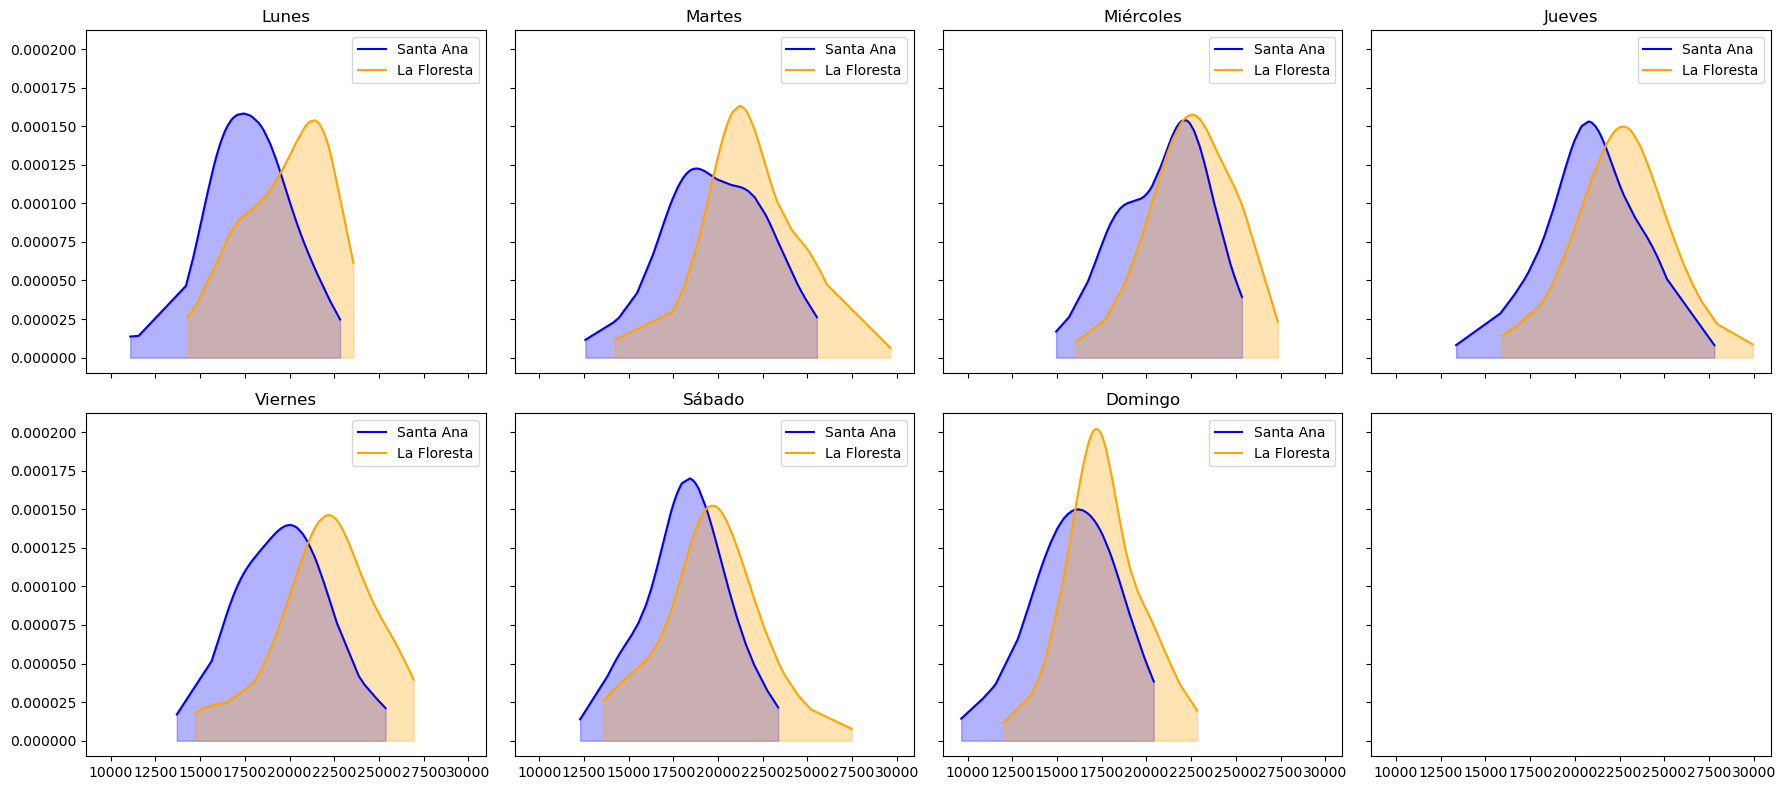

In [16]:
# Visualización de funciones empíricas de distribución y densidades para todos los días de la semana

fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharex=True, sharey=True)
axes = axes.flatten()

dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

for dia in range(7):
    x_santa_ana = fed_santa_ana_dia[dia]
    y_santa_ana = densidad_santa_ana_dia[dia](x_santa_ana)
    x_la_floresta = fed_la_floresta_dia[dia]
    y_la_floresta = densidad_la_floresta_dia[dia](x_la_floresta)
    
    axes[dia].plot(x_santa_ana, y_santa_ana, label='Santa Ana', color='blue')
    axes[dia].plot(x_la_floresta, y_la_floresta, label='La Floresta', color='orange')
    axes[dia].fill_between(x_santa_ana, y_santa_ana, alpha=0.3, color='blue')
    axes[dia].fill_between(x_la_floresta, y_la_floresta, alpha=0.3, color='orange')
    axes[dia].set_title(dias_semana[dia])
    axes[dia].legend()

plt.tight_layout()
plt.show()

In [17]:
# Función para calcular intervalos de confianza por día de la semana
def calcular_intervalos_confianza_dia(data, columna, confianza):
    intervalos = {}
    for dia in range(7):
        ventas_dia = data[data['Dia'] == dia][columna]
        media = np.mean(ventas_dia)
        sem = stats.sem(ventas_dia)
        intervalo = stats.t.interval(confianza, len(ventas_dia)-1, loc=media, scale=sem)
        intervalos[dia] = intervalo
    return intervalos

# Calcular intervalos de confianza al 95% y 99% por día de la semana
intervalos_95_santa_ana_dia = calcular_intervalos_confianza_dia(santa_ana_data, 'Ventas', 0.95)
intervalos_99_santa_ana_dia = calcular_intervalos_confianza_dia(santa_ana_data, 'Ventas', 0.99)

intervalos_95_la_floresta_dia = calcular_intervalos_confianza_dia(la_floresta_data, 'Ventas', 0.95)
intervalos_99_la_floresta_dia = calcular_intervalos_confianza_dia(la_floresta_data, 'Ventas', 0.99)

# Mostrar resultados en tablas
intervalos_confianza_santa_ana_dia = pd.DataFrame({
    'Día': dias_semana,
    'IC 95% Inferior': [intervalos_95_santa_ana_dia[dia][0] for dia in range(7)],
    'IC 95% Superior': [intervalos_95_santa_ana_dia[dia][1] for dia in range(7)],
    'IC 99% Inferior': [intervalos_99_santa_ana_dia[dia][0] for dia in range(7)],
    'IC 99% Superior': [intervalos_99_santa_ana_dia[dia][1] for dia in range(7)],
})

intervalos_confianza_la_floresta_dia = pd.DataFrame({
    'Día': dias_semana,
    'IC 95% Inferior': [intervalos_95_la_floresta_dia[dia][0] for dia in range(7)],
    'IC 95% Superior': [intervalos_95_la_floresta_dia[dia][1] for dia in range(7)],
    'IC 99% Inferior': [intervalos_99_la_floresta_dia[dia][0] for dia in range(7)],
    'IC 99% Superior': [intervalos_99_la_floresta_dia[dia][1] for dia in range(7)],
})

display(intervalos_confianza_santa_ana_dia)
display(intervalos_confianza_la_floresta_dia)


,Día,IC 95% Inferior,IC 95% Superior,IC 99% Inferior,IC 99% Superior
0,Lunes,17052.908038,18386.605150,16830.975993,18608.537195
1,Martes,19028.066451,20618.319420,18763.442579,20882.943292
2,Miércoles,20227.913196,21609.525494,19998.007890,21839.430800
3,Jueves,20155.029332,21666.068226,19903.586970,21917.510588
4,Viernes,18866.493532,20312.206988,18625.921560,20552.778960
5,Sábado,17529.907525,18836.849988,17312.427550,19054.329963
6,Domingo,15245.297121,16580.725536,15023.323154,16802.699504


,Día,IC 95% Inferior,IC 95% Superior,IC 99% Inferior,IC 99% Superior
0,Lunes,19061.860514,20417.317111,18836.307612,20642.870014
1,Martes,20945.259349,22491.217868,20688.006234,22748.470983
2,Miércoles,21876.931395,23175.820394,21660.791547,23391.960242
3,Jueves,21862.104697,23371.944500,21610.861868,23623.187328
4,Viernes,21184.220880,22753.974410,20923.008190,23015.187101
5,Sábado,18833.912876,20398.118918,18573.623307,20658.408487
6,Domingo,17009.245966,18188.523040,16813.227364,18384.541641


In [18]:
# Calcular el promedio de los intervalos de confianza inferiores y superiores para cada dia de cada tienda
promedio_ic_inferior_santa_ana_dia = intervalos_confianza_santa_ana_dia[['IC 95% Inferior', 'IC 99% Inferior']].mean(axis=1)
print (promedio_ic_inferior_santa_ana_dia)
print (min(promedio_ic_inferior_santa_ana_dia))

promedio_ic_inferior_la_floresta_dia = intervalos_confianza_la_floresta_dia[['IC 95% Inferior', 'IC 99% Inferior']].mean(axis=1)
print (promedio_ic_inferior_la_floresta_dia)
print (min(promedio_ic_inferior_la_floresta_dia))

promedio_ic_superior_santa_ana_dia = intervalos_confianza_santa_ana_dia[['IC 95% Superior', 'IC 99% Superior']].mean(axis=1)
print (promedio_ic_superior_santa_ana_dia)
print (max(promedio_ic_superior_santa_ana_dia))

promedio_ic_superior_la_floresta_dia = intervalos_confianza_la_floresta_dia[['IC 95% Superior', 'IC 99% Superior']].mean(axis=1)
print (promedio_ic_superior_la_floresta_dia)
print (max(promedio_ic_superior_la_floresta_dia))

0    16941.942015
1    18895.754515
2    20112.960543
3    20029.308151
4    18746.207546
5    17421.167538
6    15134.310137
dtype: float64
15134.310137465734
0    18949.084063
1    20816.632792
2    21768.861471
3    21736.483283
4    21053.614535
5    18703.768092
6    16911.236665
dtype: float64
16911.236665277163
0    18497.571172
1    20750.631356
2    21724.478147
3    21791.789407
4    20432.492974
5    18945.589976
6    16691.712520
dtype: float64
21791.78940690225
0    20530.093562
1    22619.844426
2    23283.890318
3    23497.565914
4    22884.580756
5    20528.263703
6    18286.532341
dtype: float64
23497.565913913568


##### Día con Menores Ventas: 

    Santa Ana:Domingo con un ICI de ~15134
    La Floresta: Domingo con un ICI de ~16911
    
##### Día con Mayores Ventas:

    Santa Ana: Jueves con un ICS de ~21791
    La Floresta: Jueves con un ICS de ~23497

### 3. Don Francisco está un poco preocupado porque tiene la impresión de que la tienda ’La Floresta’ vende menos que la tienda ’Santa Ana’. Don Francisco le entrega a Matías el cuaderno donde tiene registrado el valor total de sus ventas en cada día del año.
#### (3 puntos) Realicen pruebas de hipótesis, con base en los datos, para aceptar o rechazar la intuición de Don Francisco, con significancias de 95 % y 99 %.